# Riskfolio-Lib Tutorial: 
<br>__[Financionerioncios](https://financioneroncios.wordpress.com)__
<br>__[Orenji](https://www.orenj-i.net)__
<br>__[Riskfolio-Lib](https://riskfolio-lib.readthedocs.io/en/latest/)__
<br>__[Dany Cajas](https://www.linkedin.com/in/dany-cajas/)__
<a href='https://ko-fi.com/B0B833SXD' target='_blank'><img height='36' style='border:0px;height:36px;' src='https://cdn.ko-fi.com/cdn/kofi1.png?v=2' border='0' alt='Buy Me a Coffee at ko-fi.com' /></a> 

## Tutorial 1: Classic Mean Risk Optimization

## 1. Downloading the data:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import yfinance as yf

import backtrader as bt
import numpy as np
import warnings
import matplotlib as plt

warnings.filterwarnings("ignore")
plt.rc('font', family='Pretendard')
pd.options.display.float_format = '{:.4f}'.format

In [2]:
CSI300 = pd.read_excel('000300perf_0531.xlsx', engine='openpyxl')
CSI300.set_index("日期Date", inplace=True)
CSI300.rename(columns={"收盘Close": "CSI300"}, inplace=True)
CSI300 = CSI300.rename_axis("Date")
CSI300 = CSI300['CSI300']

# Convert the index to datetime format
CSI300.index = pd.to_datetime(CSI300.index, format='%Y%m%d')
CSI300 = CSI300.to_frame()

In [3]:
# Date range
start = '2010-01-01'
end = '2023-05-31'

# Tickers of assets
ticker_labels = {
    'ticker': ['^KS200', '229200.KS', '^GSPC', '^STOXX50E', '^N225', '000300.SS', '148070.KS', '136340.KS', 'HYG', 'GC=F', 'CL=F', '114800.KS', '138230.KS', '139660.KS', '130730.KS'],
    'labels': ['KOSPI', 'KOSDAQ', 'S&P500', 'STOXX50', 'Nikkei225', 'CSI300', '국채10년', '우량회사채', '해외채권', '금', 'WTI', 'KOSPI-Short', 'US-Long', 'US-Short', 'MMF']
}

new_dict = dict(zip(ticker_labels["ticker"], ticker_labels["labels"]))

# Downloading data
data = yf.download(ticker_labels['ticker'], start = start, end = end)
data = data.loc[:,('Close', slice(None))]
data = data.rename(columns=new_dict)

data.columns = data.columns.droplevel(level=0)
data = data.drop('CSI300', axis=1)
data = data.merge(CSI300[['CSI300']], left_index=True, right_index=True, how='left')

# Print the merged DataFrame
data = data.sort_index(axis=1)
data = data.dropna()

assets = data.columns

[*********************100%***********************]  15 of 15 completed


In [4]:
# Calculating returns
Y = data.pct_change().dropna()
Y

,CSI300,KOSDAQ,KOSPI,KOSPI-Short,MMF,Nikkei225,S&P500,STOXX50,US-Long,US-Short,WTI,국채10년,금,우량회사채,해외채권
Date,,,,,,,,,,,,,,,
2015-10-14,0.0333,-0.0124,-0.0044,-0.0006,0.0002,-0.0138,-0.0095,-0.0104,-0.0095,0.0093,-0.0564,-0.0028,0.0309,-0.0001,-0.0048
2015-10-15,0.0237,0.0082,0.0120,-0.0134,0.0002,0.0115,0.0149,0.0148,-0.0130,0.0138,-0.0056,0.0051,0.0066,0.0009,0.0024
2015-10-16,0.0136,0.0148,-0.0021,0.0019,0.0000,0.0108,0.0046,0.0081,-0.0017,0.0018,0.0190,-0.0005,-0.0036,-0.0006,0.0046
2015-10-19,0.0000,-0.0009,0.0004,0.0018,0.0000,-0.0088,0.0003,0.0022,-0.0077,0.0091,-0.0290,-0.0008,-0.0087,0.0002,0.0027
2015-10-21,-0.0172,0.0057,0.0072,-0.0074,-0.0002,0.0233,-0.0072,0.0001,0.0090,-0.0108,-0.0150,-0.0036,-0.0049,0.0000,-0.0001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-22,0.0063,0.0182,0.0061,-0.0077,0.0000,0.0090,0.0002,-0.0022,-0.0059,0.0062,0.0061,0.0021,-0.0020,0.0002,0.0044
2023-05-23,-0.0141,0.0113,0.0024,-0.0011,0.0001,-0.0042,-0.0112,-0.0099,-0.0049,0.0056,0.0128,-0.0059,-0.0012,-0.0001,-0.0052
2023-05-25,-0.0160,-0.0192,-0.0052,0.0044,0.0002,-0.0051,0.0014,-0.0168,0.0113,-0.0116,-0.0148,-0.0093,-0.0149,-0.0016,-0.0077


## 2. Estimating Mean Variance Portfolios

### 2.1 Calculating the portfolio that maximizes Sharpe ratio.

### 2.2 Plotting portfolio composition

### 2.3 Calculate efficient frontier

## 3. Estimating Mean Risk Portfolios

In this part I will calculate optimal portfolios for several risk measures. First I'm going to calculate the portfolio that maximizes risk adjusted return when CVaR is the risk measure, then I'm going to calculate the portfolios that maximize the risk adjusted return for all available risk measures.

### 3.1 Calculating the portfolio that maximizes Return/CVaR ratio.

### 3.2 Plotting portfolio composition

### 3.3 Calculate efficient frontier

### 3.4 Calculate Optimal Portfolios for Several Risk Measures

## 4. Constraints on Assets and Assets Classes

### 4.1 Creating the constraints

In this part I use dictionaries to create the constraints but is prefered to create the tables in excel and upload them with pandas.read_excel.

In [8]:
Asset = ['KOSPI', 'KOSDAQ', 'S&P500', 'STOXX50', 'Nikkei225', 'CSI300', '국채10년', '우량회사채', '해외채권', '금', 'WTI', 'KOSPI-Short', 'US-Long', 'US-Short', 'MMF']
Class = ['DS', 'DS', 'FS', 'FS', 'FS', 'FS', 'Bond', 'Bond', 'Bond', 'COM', 'COM', 'Inverse', 'FX', 'FX', 'Cash']
Disabled = [False] * 27
Type = ['Classes'] * 11 + ['Assets'] * 16
Set = ['Class'] * 11 + [''] * 16
Position = ['DS', 'DS', 'FS', 'FS', 'Bond', 'Bond', 'COM', 'COM', 'Inverse', 'FX', 'Cash',
            'KOSPI', 'KOSDAQ', 'S&P500', 'STOXX50', 'Nikkei225', 'CSI300',
            '국채10년', '우량회사채', '해외채권',
            '금', 'WTI', 'KOSPI-Short', 'US-Long', 'US-Short',
            'MMF', '해외채권']
TypeRelative=  [''] * 27
RelativeSet =  [''] * 27
Relative = [''] * 27
Factor = [''] * 27

# DS상하한(2), FS상하한(2), Bond상하한(2), COM상하한(2), Inverse(1), FX(1), Cash(1)
# KOSPI상한, #KOSDAQ상한, S&P상한, STO상한, Nik상한, CSI상한,
# 국채상한, 회사채상한, 해채상한,
# 금, WTI, 코숏, 달러롱, 달러숏,
# 현금하한, 해채하한
Sign = ['<=', '>=', '<=', '>=', '<=', '>=', '<=', '>=', '<=', '<=', '<=', 
        '<=', '<=', '<=', '<=', '<=', '<=',
        '<=', '<=', '<=',
        '<=', '<=', '<=', '<=', '<=',
        '>=', '>=']

Weight = [0.40, 0.10, 0.40, 0.10, 0.60, 0.20, 0.20, 0.05, 0.20, 0.20, 0.50,
          0.40, 0.20, 0.20, 0.20, 0.20, 0.20,
          0.50, 0.40, 0.40,
          0.15, 0.15, 0.20, 0.20, 0.20,
          0.01, 0.05]

constraints_list = [Asset, Class, Disabled, Type, Set, Position, Sign, Weight]
for i in constraints_list:
    print(constraints_list.index(i) , len(i))

0 15
1 15
2 27
3 27
4 27
5 27
6 27
7 27


In [9]:
asset_classes = {'Assets': Asset,
                 'Class': Class
                 }

asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=['Assets'])

constraints = {'Disabled': Disabled,
               'Type': Type,
               'Set': Set,
               'Position': Position,
               'Sign': Sign,
               'Weight': Weight,
               'Type Relative': TypeRelative,
               'Relative Set': RelativeSet,
               'Relative': Relative,
               'Factor': Factor
}

constraints = pd.DataFrame(constraints)

display(constraints)

,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative,Factor
0,False,Classes,Class,DS,<=,0.4000,,,,
1,False,Classes,Class,DS,>=,0.1000,,,,
2,False,Classes,Class,FS,<=,0.4000,,,,
3,False,Classes,Class,FS,>=,0.1000,,,,
4,False,Classes,Class,Bond,<=,0.6000,,,,
5,False,Classes,Class,Bond,>=,0.2000,,,,
6,False,Classes,Class,COM,<=,0.2000,,,,
7,False,Classes,Class,COM,>=,0.0500,,,,
8,False,Classes,Class,Inverse,<=,0.2000,,,,
9,False,Classes,Class,FX,<=,0.2000,,,,


In [10]:
import riskfolio as rp
A, B = rp.assets_constraints(constraints, asset_classes)

### 4.2 Optimize the portfolio with the constraints

In [11]:
port.ainequality = A
port.binequality = B

model = 'Classic'
rm = 'MV'
obj = 'Sharpe'
rf = 0

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,CSI300,KOSDAQ,KOSPI,KOSPI-Short,MMF,Nikkei225,S&P500,STOXX50,US-Long,US-Short,WTI,국채10년,금,우량회사채,해외채권
weights,0.0030,0.0000,0.1000,0.0708,0.1275,0.0836,0.0743,0.0000,0.2000,0.0000,0.0000,0.0000,0.1408,0.1500,0.0500


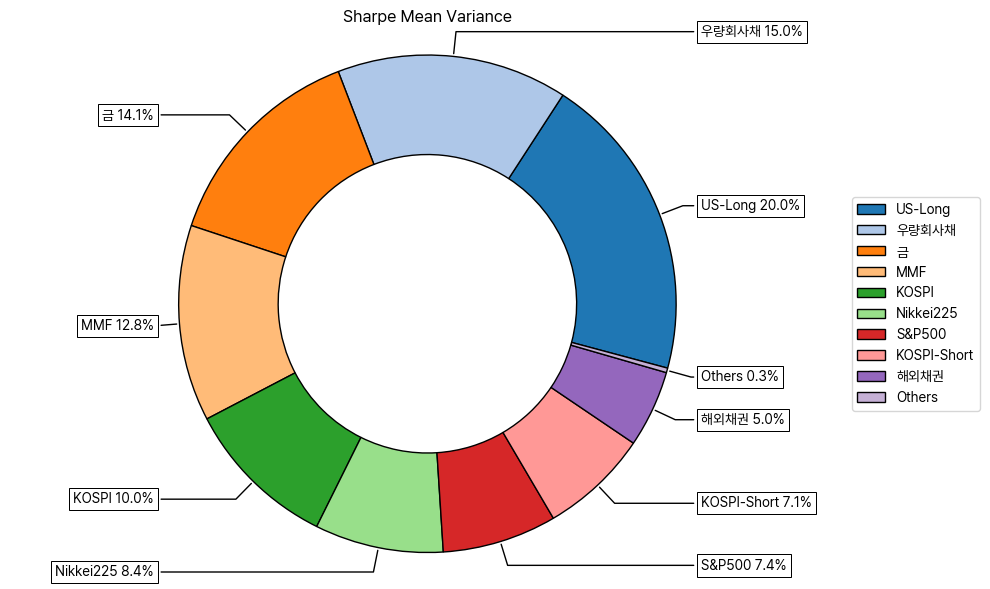

In [12]:
ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.01, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [13]:
w_classes = pd.concat([asset_classes.set_index('Assets'), w], axis=1)
display(w_classes)

w_classes = w_classes.groupby(['Class']).sum()
display(w_classes)

,Class,weights
CSI300,FS,0.0030
KOSDAQ,DS,0.0000
KOSPI,DS,0.1000
KOSPI-Short,Inverse,0.0708
MMF,Cash,0.1275
Nikkei225,FS,0.0836
S&P500,FS,0.0743
STOXX50,FS,0.0000
US-Long,FX,0.2000
US-Short,FX,0.0000


,weights
Class,
Bond,0.2000
COM,0.1408
Cash,0.1275
DS,0.1000
FS,0.1609
FX,0.2000
Inverse,0.0708


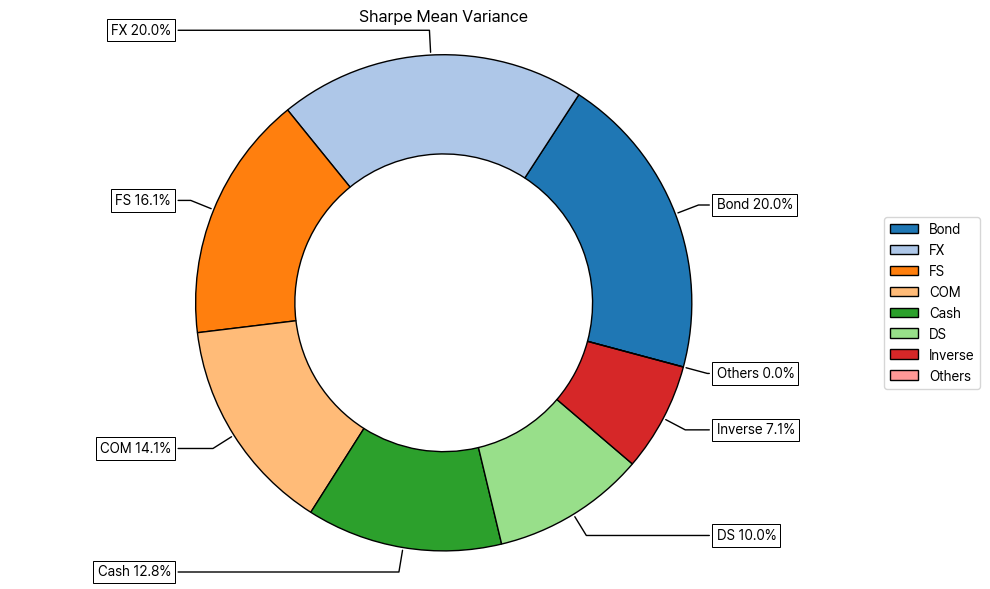

In [14]:
ax = rp.plot_pie(w=w_classes, title='Sharpe Mean Variance', others=0.05, nrow=25,
                 cmap = "tab20", height=6, width=10, ax=None)

In [15]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,CSI300,KOSDAQ,KOSPI,KOSPI-Short,MMF,Nikkei225,S&P500,STOXX50,US-Long,US-Short,WTI,국채10년,금,우량회사채,해외채권
0,0.0304,0.0000,0.1043,0.1687,0.1525,0.0523,0.0035,0.0139,0.1128,0.0872,0.0000,0.0000,0.0500,0.1745,0.0500
1,0.0214,0.0000,0.1000,0.1183,0.1936,0.0536,0.0250,0.0000,0.1525,0.0475,0.0000,0.0000,0.0500,0.1881,0.0500
2,0.0175,0.0000,0.1000,0.1024,0.2051,0.0535,0.0290,0.0000,0.1677,0.0323,0.0000,0.0000,0.0603,0.1823,0.0500
3,0.0143,0.0000,0.1000,0.0897,0.2140,0.0538,0.0320,0.0000,0.1802,0.0198,0.0000,0.0000,0.0713,0.1750,0.0500
4,0.0113,0.0000,0.1000,0.0779,0.2222,0.0540,0.0347,0.0000,0.1918,0.0082,0.0000,0.0000,0.0815,0.1683,0.0500


In [16]:
label = 'Max Risk Adjusted Return Portfolio' # Title of point

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

NameError: name 'mu' is not defined

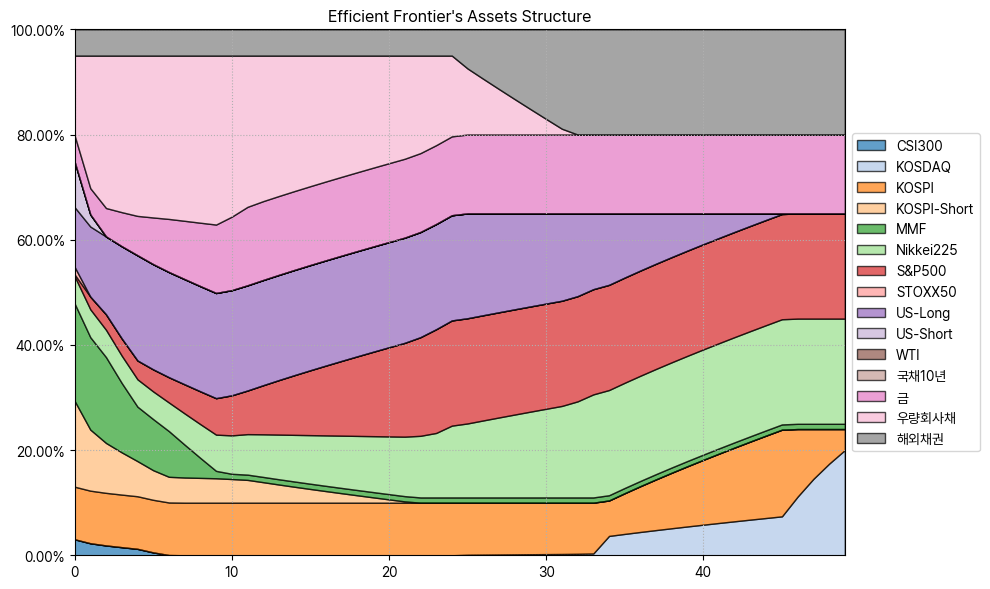

In [31]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

In [32]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
CSI300,1.35%,0.80%,1.33%,0.96%,1.34%,1.52%,2.82%,4.51%,8.72%,0.00%,2.08%,0.84%,6.21%
KOSDAQ,0.00%,0.01%,0.00%,0.00%,0.00%,0.25%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
KOSPI,10.00%,9.99%,10.00%,10.00%,10.00%,9.75%,10.00%,10.00%,10.00%,10.00%,10.00%,10.00%,10.00%
KOSPI-Short,7.20%,6.60%,7.26%,6.75%,7.42%,7.06%,11.96%,14.92%,11.23%,8.97%,10.11%,9.69%,11.50%
MMF,11.42%,18.14%,10.42%,15.88%,10.44%,5.72%,1.00%,1.00%,17.47%,22.96%,20.98%,20.88%,21.00%
Nikkei225,5.20%,4.39%,5.45%,4.29%,5.52%,5.52%,6.37%,5.09%,0.18%,5.73%,5.48%,5.29%,1.97%
S&P500,3.45%,4.81%,3.22%,4.75%,3.14%,2.96%,0.81%,0.40%,1.10%,4.27%,2.44%,3.86%,1.82%
STOXX50,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
US-Long,19.08%,16.07%,20.00%,16.55%,20.00%,20.00%,20.00%,15.74%,20.00%,19.88%,18.85%,20.00%,20.00%
US-Short,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


<Axes: >

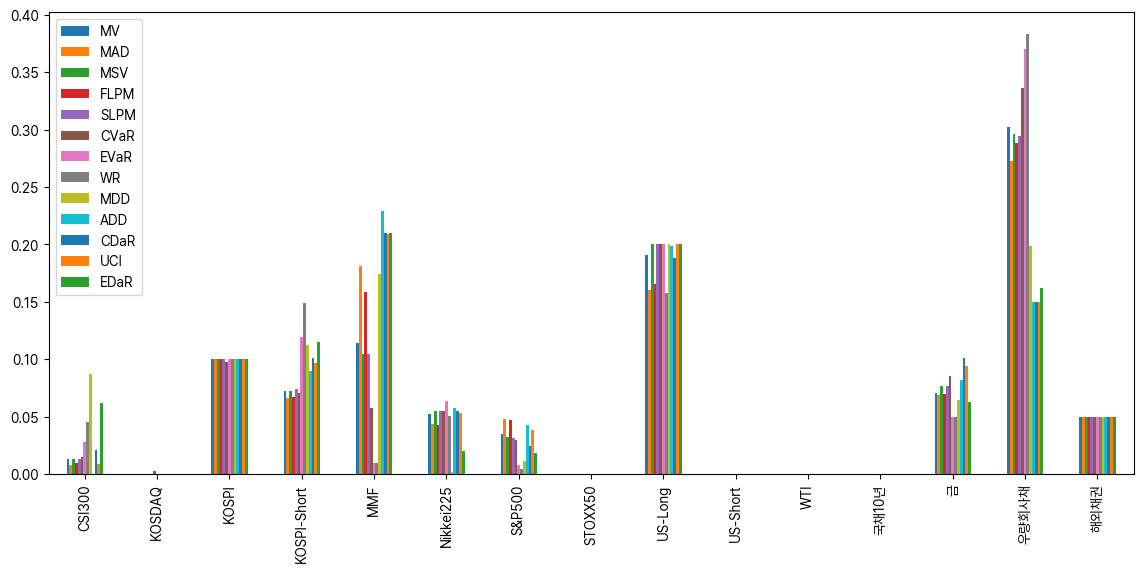

In [33]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)

# 백테스트

In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime
import matplotlib as plt
import vectorbt as vbt # version=0.23.0
from vectorbt.portfolio.nb import order_nb, sort_call_seq_nb
from vectorbt.portfolio.enums import SizeType, Direction

import warnings

warnings.filterwarnings("ignore")
plt.rc('font', family='Pretendard')
pd.options.display.float_format = '{:.4f}'.format

In [2]:
CSI300 = pd.read_excel('000300perf_0531.xlsx', engine='openpyxl')
CSI300.set_index("日期Date", inplace=True)
CSI300.rename(columns={"收盘Close": "CSI300"}, inplace=True)
CSI300 = CSI300.rename_axis("Date")
CSI300 = CSI300['CSI300']

# Convert the index to datetime format
CSI300.index = pd.to_datetime(CSI300.index, format='%Y%m%d')
CSI300 = CSI300.to_frame()

In [74]:
# Date range
start = '2010-01-01'
end = '2023-05-31'

# Tickers of assets
ticker_labels = {
    'ticker': ['^KS200', '229200.KS', '^GSPC', '^STOXX50E', '^N225', '000300.SS', '148070.KS', '136340.KS', 'HYG', 'GC=F', 'CL=F', '114800.KS', '138230.KS', '139660.KS', '130730.KS'],
    'labels': ['KOSPI', 'KOSDAQ', 'S&P500', 'STOXX50', 'Nikkei225', 'CSI300', '국채10년', '우량회사채', '해외채권', '금', 'WTI', 'KOSPI-Short', 'US-Long', 'US-Short', 'MMF']
}

new_dict = dict(zip(ticker_labels["ticker"], ticker_labels["labels"]))

# Downloading data
data = yf.download(ticker_labels['ticker'], start = start, end = end)
data = data.loc[:,('Close', slice(None))]
data = data.rename(columns=new_dict)

data.columns = data.columns.droplevel(level=0)
data = data.drop('CSI300', axis=1)
data = data.merge(CSI300[['CSI300']], left_index=True, right_index=True, how='left')

# Print the merged DataFrame
data = data.sort_index(axis=1)
data = data.dropna()

assets = data.columns

[*********************100%***********************]  15 of 15 completed


In [84]:
data.describe()

,CSI300,KOSDAQ,KOSPI,KOSPI-Short,MMF,Nikkei225,S&P500,STOXX50,US-Long,US-Short,WTI,국채10년,금,우량회사채,해외채권
count,1602.0000,1602.0000,1602.0000,1602.0000,1602.0000,1602.0000,1602.0000,1602.0000,1602.0000,1602.0000,1602.0000,1602.0000,1602.0000,1602.0000,1602.0000
mean,3985.1208,11856.0112,309.2377,6051.1486,101473.1929,23061.1297,3140.7577,3522.4510,12259.0262,10452.1785,60.0720,119200.3027,1518.0158,103553.5549,84.0176
std,623.1405,1998.4322,53.3689,1390.4016,457.0485,4032.0587,802.4854,392.2064,877.8007,739.5386,18.6985,5606.6990,280.7401,1341.3232,4.4666
min,2877.4700,7220.0000,199.2800,3675.0000,100505.0000,14952.0195,1859.3300,2385.8201,10790.0000,8255.0000,-37.6300,100580.0000,1050.8000,99525.0000,68.6300
25%,3481.8375,10236.2500,269.5125,4795.0000,101120.0000,19931.3501,2474.2450,3278.5775,11640.0000,10080.0000,47.3325,115962.5000,1267.0000,102501.2500,82.7050
50%,3890.4400,11497.5000,302.3050,6237.5000,101430.0000,22494.3350,2905.9250,3478.2350,12050.0000,10600.0000,56.9500,119665.0000,1459.2000,103840.0000,85.8200
75%,4255.9000,13618.7500,328.4825,7075.0000,101785.0000,27192.8052,3909.7899,3738.7775,12625.0000,10985.0000,70.4600,123343.7500,1796.2750,104620.0000,87.1600
max,5807.7200,17140.0000,440.4000,9180.0000,102765.0000,31328.1602,4793.5400,4408.5898,15205.0000,11785.0000,123.7000,130485.0000,2051.5000,105690.0000,88.9700


In [85]:
vbt.settings.returns['year_freq'] = '252 days'

num_tests = 2000
ann_factor = data.vbt.returns(freq='D').ann_factor

def pre_sim_func_nb(sc, every_nth):
    # Define rebalancing days
    sc.segment_mask[:, :] = False
    sc.segment_mask[every_nth::every_nth, :] = True
    return ()


def pre_segment_func_nb(sc, find_weights_nb, rm, history_len, ann_factor, num_tests, srb_sharpe):
    if history_len == -1:
        # Look back at the entire time period
        close = sc.close[:sc.i, sc.from_col:sc.to_col]
    else:
        # Look back at a fixed time period
        if sc.i - history_len <= 0:
            return (np.full(sc.group_len, np.nan),)  # insufficient data
        close = sc.close[sc.i - history_len:sc.i, sc.from_col:sc.to_col]
    
    # Find optimal weights
    best_sharpe_ratio, weights = find_weights_nb(sc, rm, close, num_tests)
    srb_sharpe[sc.i] = best_sharpe_ratio
        
    # Update valuation price and reorder orders
    size_type = np.full(sc.group_len, SizeType.TargetPercent)
    direction = np.full(sc.group_len, Direction.LongOnly)
    temp_float_arr = np.empty(sc.group_len, dtype=np.float_)
    for k in range(sc.group_len):
        col = sc.from_col + k
        sc.last_val_price[col] = sc.close[sc.i, col]
    sort_call_seq_nb(sc, weights, size_type, direction, temp_float_arr)
    
    return (weights,)


def order_func_nb(oc, weights):
    col_i = oc.call_seq_now[oc.call_idx]
    return order_nb(
        weights[col_i], 
        oc.close[oc.i, oc.col],
        size_type=SizeType.TargetPercent, 
    )

In [86]:
import riskfolio as rp

def opt_weights(sc, rm, close, num_tests):
    # Calculate expected returns and sample covariance matrix
    close = pd.DataFrame(close, columns=assets)
    returns = close.pct_change().dropna()

    # Building the portfolio object
    port = rp.Portfolio(returns=returns)
    # Calculating optimum portfolio

    # Select method and estimate input parameters:

    method_mu='hist' # Method to estimate expected returns based on historical data.
    method_cov='hist' # Method to estimate covariance matrix based on historical data.

    port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

    # Estimate optimal portfolio:
    
    port.solvers = ['MOSEK']
    model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
    rm = rm # Risk measure used, this time will be variance
    obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
    hist = True # Use historical scenarios for risk measures that depend on scenarios
    rf = 0 # Risk free rate
    l = 0 # Risk aversion factor, only useful when obj is 'Utility'

    w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
    weights = np.ravel(w.to_numpy())  
    shp = rp.Sharpe(w, port.mu, cov=port.cov, returns=returns, rm=rm, rf=0, alpha=0.05)

    return shp, weights

In [78]:
%%time

# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded returns.
# 'UCI': Ulcer Index of uncompounded returns.


rms = ["MV", "CVaR", "EVaR", "WR", "CDaR"]

sharpe = {}
portfolio = {}

for i in rms:
    sharpe[i] = np.full(data.shape[0], np.nan)

    # Run simulation with a custom order function (Numba should be disabled)
    portfolio[i] = vbt.Portfolio.from_order_func(
        data,
        order_func_nb,
        pre_sim_func_nb=pre_sim_func_nb,
        pre_sim_args=(30,),
        pre_segment_func_nb=pre_segment_func_nb,
        pre_segment_args=(opt_weights, i, 252*4, ann_factor, num_tests, sharpe[i]),
        cash_sharing=True, 
        group_by=True,
        use_numba=False,
    )

CPU times: total: 2.53 s
Wall time: 7.66 s


In [87]:
vbt.settings['plotting']['layout']['width'] = 900
vbt.settings['plotting']['layout']['height'] = 400

def plot_allocation(rb_pf):
    # Plot weights development of the portfolio
    rb_asset_value = rb_pf.asset_value(group_by=False)
    rb_value = rb_pf.value()
    rb_idxs = np.flatnonzero((rb_pf.asset_flow() != 0).any(axis=1))
    rb_dates = rb_pf.wrapper.index[rb_idxs]
    fig = (rb_asset_value.vbt / rb_value).vbt.plot(
        trace_names=assets,
        trace_kwargs=dict(
            stackgroup='one'
        )
    )
    for rb_date in rb_dates:
        fig.add_shape(
            dict(
                xref='x',
                yref='paper',
                x0=rb_date,
                x1=rb_date,
                y0=0,
                y1=1,
                line_color=fig.layout.template.layout.plot_bgcolor
            )
        )
    fig.show_svg()
    
for i in rms:
    plot_allocation(portfolio[i])